In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

db = mysql.connector.connect()

In [124]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('order_items.csv', 'order_items'),
    ('payments.csv', 'payments'),
    ('geolocation.csv', 'geolocation')
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='1234Mahi@',
    database='ecommercedata'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/mahen/Desktop/summer project/project-d'

# Function to map pandas dtypes to SQL types
def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'BIGINT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    try:
        file_path = os.path.join(folder_path, csv_file)

        if not os.path.exists(file_path):
            print(f"File not found: {file_path}")
            continue

        df = pd.read_csv(file_path)

        if df.empty:
            print(f"Skipping empty file: {csv_file}")
            continue

        print(f"\n Processing {csv_file}")
        print("Column types:\n", df.dtypes)

        # Clean and normalize column names
        df.columns = [col.strip().replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

        # Replace NaN with None
        df = df.where(pd.notnull(df), None)

        # Create table schema
        columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
        create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
        cursor.execute(create_table_query)

        # Insert data
        for _, row in df.iterrows():
            values = tuple(None if pd.isna(x) else x for x in row)
            sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
            try:
                cursor.execute(sql, values)
            except Exception as insert_err:
                print(f"Insert error in {csv_file}, row: {values}")
                print(f"    → {insert_err}")
                break  # Stop inserting further rows from this file

        conn.commit()
        print(f"Successfully imported {csv_file} into `{table_name}`")

    except Exception as e:
        print(f"Error while processing {csv_file}: {e}")

# Close connection
cursor.close()
conn.close()
print("\nAll done.")




 Processing customers.csv
Column types:
 customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object
Successfully imported customers.csv into `customers`

 Processing orders.csv
Column types:
 order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object
Successfully imported orders.csv into `orders`

 Processing sellers.csv
Column types:
 seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object
Successfully imported sellers.csv into `sellers`

 Processing products.csv
Column types:
 product_id          

In [162]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [163]:
#connection
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
# Corrected connection parameters
db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="1234Mahi@",
    database="ecommercedata",
    auth_plugin='mysql_native_password'
)
cur = db.cursor()
# import mysql.connector
# try:
#     db = mysql.connector.connect(
#         host="127.0.0.1",  # Use IP, not 'localhost'
#         user="root",
#         password="1234Mahi@",
#         database="ecommercedata"
#     )
#     print("Connected successfully!")
#     db.close()
# except mysql.connector.Error as err:
#     print(f"MySQL Error: {err}")

In [164]:
if db.is_connected():
    print("Connection to MySQL database is successful.")

Connection to MySQL database is successful.


In [197]:
#list all unique cities where customers are located
query = """ select distinct customer_city from customers """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["city"])
df.head(15)

,city
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas
5,jaragua do sul
6,timoteo
7,curitiba
8,belo horizonte
9,montes claros


In [168]:
#Count the number of orders placed in 2017.
query = """ select count(order_id) from orders where year(order_purchase_timestamp) = 2017 """
cur.execute(query)
data = cur.fetchall()
"total orders placed in 2017 are", data[0][0]

('total orders placed in 2017 are', 135303)

In [204]:
#Find the total sales per category.
query = """ select upper(products.product_category) category, round(sum(payments.payment_value),2) sales
from products join order_items on products.product_id = order_items.product_id
join payments on payments.order_id = order_items.order_id group by category """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Category", "Sales"])
df.head(10)

,Category,Sales
0,PERFUMERY,13681943.82
1,FURNITURE DECORATION,38614762.58
2,TELEPHONY,13145815.37
3,BED TABLE BATH,46238949.12
4,AUTOMOTIVE,23011946.94
5,COMPUTER ACCESSORIES,42803922.05
6,HOUSEWARES,29558469.52
7,BABIES,14575832.81
8,TOYS,16714017.62
9,FURNITURE OFFICE,17464315.15


In [205]:
total_sales = df['Sales'].sum()
print("Total Sales across all categories:", round(total_sales, 2))
# Get the first 20 rows
top = df.head(20)

# Calculate the sum of their Sales
sum_top = top["Sales"].sum()

# Print the result
print("Sum of Sales for first 20 categories:", round(sum_top, 2))

Total Sales across all categories: 548319637.11
Sum of Sales for first 20 categories: 433026823.87


In [201]:
# Calculate the percentage of orders that were paid in installments.
query = """ select ((sum(case when payment_installments >= 1 then 1 else 0 end))/count(*))*100 from payments """
cur.execute(query)
data = cur.fetchall()
"the percentage of orders that were paid in installments is", data[0][0]

('the percentage of orders that were paid in installments is',
 Decimal('99.9981'))

[('SP', 125238), ('SC', 10911), ('MG', 34905), ('PR', 15135), ('RJ', 38556), ('RS', 16398), ('PA', 2925), ('GO', 6060), ('ES', 6099), ('BA', 10140), ('MA', 2241), ('MS', 2145), ('CE', 4008), ('DF', 6420), ('RN', 1455), ('PE', 4956), ('MT', 2721), ('AM', 444), ('AP', 204), ('AL', 1239), ('RO', 759), ('PB', 1608), ('TO', 840), ('PI', 1485), ('AC', 243), ('SE', 1050), ('RR', 138)]


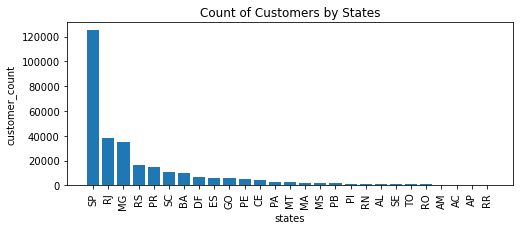

In [206]:

# Count the number of customers from each state
query = """ select customer_state ,count(customer_id) from customers group by customer_state """
cur.execute(query)
data = cur.fetchall()
print(data)
df = pd.DataFrame(data, columns = ["state", "customer_count" ])
df = df.sort_values(by = "customer_count", ascending= False)
plt.figure(figsize = (8,3))
plt.bar(df["state"], df["customer_count"])
plt.xticks(rotation = 90)
plt.xlabel("states")
plt.ylabel("customer_count")
plt.title("Count of Customers by States")
plt.show()

[('July', 18876), ('August', 19536), ('February', 20184), ('June', 18501), ('March', 21633), ('January', 21807), ('May', 20619), ('April', 20817), ('September', 48), ('October', 12)]


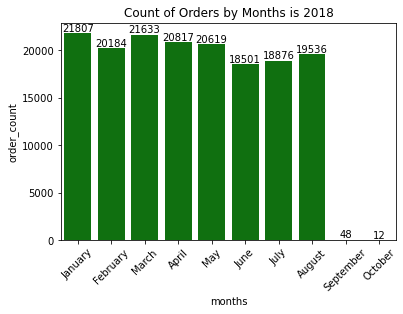

In [207]:
# Calculate the number of orders per month in 2018
query = """ select monthname(order_purchase_timestamp) months, count(order_id) order_count from orders 
where year(order_purchase_timestamp) = 2018 group by months """

cur.execute(query)
data = cur.fetchall()
print(data)
df = pd.DataFrame(data, columns = ["months", "order_count"])
o = ["January", "February","March","April","May","June","July","August","September","October"]

ax = sns.barplot(x = df["months"],y =  df["order_count"], data = df, order = o, color = "green")
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.title("Count of Orders by Months is 2018")
plt.show()

In [209]:
# Find the average number of products per order, grouped by customer city.
query = """with count_per_order as (select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
from orders join order_items on orders.order_id = order_items.order_id group by orders.order_id, orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),2) average_orders from customers join count_per_order
on customers.customer_id = count_per_order.customer_id group by customers.customer_city order by average_orders desc """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["customer city", "average products/order"])
df.head(10)

,customer city,average products/order
0,padre carvalho,63.00
1,celso ramos,58.50
2,datas,54.00
3,candido godoi,54.00
4,matias olimpio,45.00
5,cidelandia,36.00
6,curralinho,36.00
7,picarra,36.00
8,morro de sao paulo,36.00
9,teixeira soares,36.00


In [180]:
# Calculate the percentage of total revenue contributed by each product category.
query = """select upper(products.product_category) category, 
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) sales_percentage
from products join order_items 
on products.product_id = order_items.product_id
join payments 
on payments.order_id = order_items.order_id
group by category order by sales_percentage desc"""


cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Category", "percentage distribution"])
df.head()

,Category,percentage distribution
0,BED TABLE BATH,96.28
1,HEALTH BEAUTY,93.18
2,COMPUTER ACCESSORIES,89.13
3,FURNITURE DECORATION,80.40
4,WATCHES PRESENT,80.35


In [182]:
# Identify the correlation between product price and the number of times a product has been purchased.
query = """select products.product_category, count(order_items.product_id), round(avg(order_items.price),2)
from products join order_items on products.product_id = order_items.product_id group by products.product_category"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Category", "order_count","price"])
arr1 = df["order_count"]
arr2 = df["price"]

a = np.corrcoef([arr1,arr2])
print(a)
print("the correlation is", a[0][-1])

[[ 1.         -0.10631514]
 [-0.10631514  1.        ]]
the correlation is -0.10631514167157562


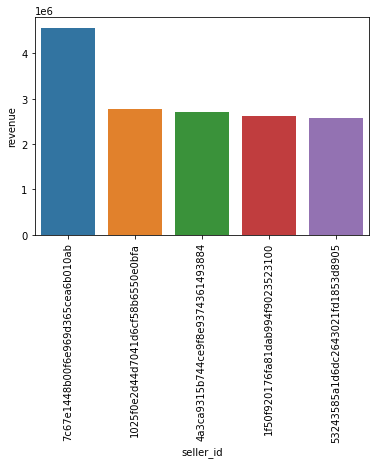

In [184]:
# Calculate the total revenue generated by each seller, and rank them by revenue.
query = """ select *, dense_rank() over(order by revenue desc) as rn from
(select order_items.seller_id, sum(payments.payment_value)
revenue from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["seller_id", "revenue", "rank"])
df = df.head()
sns.barplot(x = "seller_id", y = "revenue", data = df)
plt.xticks(rotation = 90)
plt.show()

In [217]:
# Calculate the moving average of order values for each customer over their order history.
query = """select customer_id, order_purchase_timestamp, payment, avg(payment) over(partition by customer_id 
order by order_purchase_timestamp rows between 2 preceding and current row) as mov_avg from
(select orders.customer_id, orders.order_purchase_timestamp, payments.payment_value as payment from payments join orders
on payments.order_id = orders.order_id) as a """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["customer_id","order_purchase_timestamp","payment","moving_avg"])
df

,customer_id,order_purchase_timestamp,payment,moving_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
4,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
...,...,...,...,...
934969,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
934970,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
934971,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
934972,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001


In [215]:
# Calculate the cumulative sales per month for each year.
query = """select years, months , payment, sum(payment) over(order by years, months) cumulative_sales from 
(select year(orders.order_purchase_timestamp) as years, month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment from orders join payments on orders.order_id = payments.order_id
group by years, months order by years, months) as a """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years","months","payment","cumulative_sales"])
df

,years,months,payment,cumulative_sales
0,2016,9,2270.16,2.270160e+03
1,2016,10,531814.32,5.340845e+05
2,2016,12,176.58,5.342611e+05
3,2017,1,1246392.36,1.780653e+06
4,2017,2,2627172.09,4.407826e+06
5,2017,3,4048772.40,8.456598e+06
6,2017,4,3760092.27,1.221669e+07
7,2017,5,5336269.38,1.755296e+07
8,2017,6,4601487.42,2.215445e+07
9,2017,7,5331446.28,2.748589e+07


In [190]:
# Calculate the year-over-year growth rate of total sales.
query = """with a as(select year(orders.order_purchase_timestamp) as years, round(sum(payments.payment_value),2) as payment
from orders join payments on orders.order_id = payments.order_id group by years order by years)
select years, ((payment - lag(payment, 1) over(order by years))/ lag(payment, 1) over(order by years)) * 100 from a"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years", "yoy % growth"])
df

,years,yoy % growth
0,2016,NaN
1,2017,12112.703758
2,2018,20.000924


In [192]:
# Calculate the retention rate of customers, defined as the percentage of customers
# who make another purchase within 6 months of their first purchase.
query = """with a as (select customers.customer_id, min(orders.order_purchase_timestamp) first_order from customers join orders
on customers.customer_id = orders.customer_id group by customers.customer_id), b as (select a.customer_id, 
count(distinct orders.order_purchase_timestamp) next_order from a join orders on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order and orders.order_purchase_timestamp < date_add(first_order, interval 6 month)
group by a.customer_id) select 100 * (count( distinct a.customer_id)/ count(distinct b.customer_id)) 
from a left join b on a.customer_id = b.customer_id ;"""
cur.execute(query)
data = cur.fetchall()
data

[(None,)]

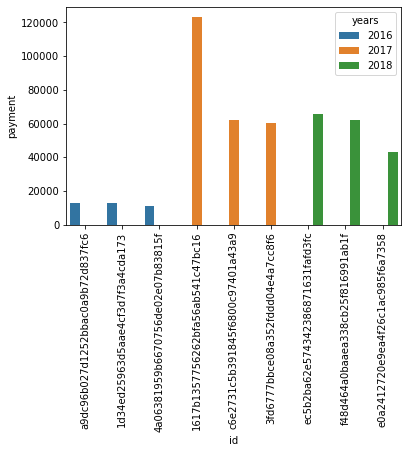

In [194]:
# Identify the top 3 customers who spent the most money in each year.
query = """select years, customer_id, payment, d_rank from (select year(orders.order_purchase_timestamp) years,
orders.customer_id, sum(payments.payment_value) payment, dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank from orders join payments  on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp), orders.customer_id) as a where d_rank <= 3 ;"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years","id","payment","rank"])
sns.barplot(x = "id", y = "payment", data = df, hue = "years")
plt.xticks(rotation = 90)
plt.show()